# MINOR PROJECT #

## Working with numpy Matrices (Multidimensional Data) ##

In [3]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('TkAgg')
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler

In [5]:
#Load the male and female datasets
male = np.genfromtxt(r'C:\Users\Rasi\Downloads\nhanes_adult_male_bmx_2020.csv',delimiter=',',skip_header=1)
female=np.genfromtxt(r'C:\Users\Rasi\Downloads\nhanes_adult_female_bmx_2020.csv',delimiter=',',skip_header=1)

In [7]:
print("Male")
print(male)
print("\nFemale")
print(female)

Male
[[  nan   nan   nan ...   nan   nan   nan]
 [ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]

Female
[[  nan   nan   nan ...   nan   nan   nan]
 [ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


In [9]:
# Represents each column
column_names=['weight(kg)','standing height(cm)','upper arm lenght(cm)','upper leg length(cm)','arm circumference(cm)','hip circumferene','waist circumference']

In [11]:
male_dict={column_names[i]:male[:,i]
for i in range(male.shape[1])}
for name in column_names:
    print(f"{name}:{male_dict[name]}")

weight(kg):[  nan  98.8  74.3 ... 108.8  79.5  59.7]
standing height(cm):[  nan 182.3 184.2 ... 168.7 176.4 167.5]
upper arm lenght(cm):[ nan 42.  41.1 ... 38.6 39.5 40.3]
upper leg length(cm):[ nan 40.1 41.  ... 45.6 42.  41.1]
arm circumference(cm):[ nan 38.2 30.2 ... 33.6 31.4 29.2]
hip circumferene:[  nan 108.2  94.5 ... 118.   99.8  90.5]
waist circumference:[  nan 120.4  86.8 ... 114.7  97.1  86.9]


In [13]:
female_dict={column_names[i]:female[:,i]
for i in range(female.shape[1])}
for name in column_names:
    print(f"{name}:{female_dict[name]}")

weight(kg):[ nan 97.1 91.1 ... 73.  78.6 82.8]
standing height(cm):[  nan 160.2 152.7 ... 159.6 168.5 147.8]
upper arm lenght(cm):[ nan 34.7 33.5 ... 36.2 38.1 34.8]
upper leg length(cm):[ nan 40.8 33.  ... 37.  40.2 32.8]
arm circumference(cm):[ nan 35.8 38.5 ... 31.4 36.  39.5]
hip circumferene:[  nan 126.1 125.5 ... 104.6 102.4 121.4]
waist circumference:[  nan 117.9 103.1 ...  99.3  98.5 110. ]


#### To draw Histograms for Female and Male Weights ####

In [16]:
#Extract the weights for male and female
male_weights=male[:,0]
female_weights=female[:,0]

In [18]:
print(male_weights)
print(female_weights)

[  nan  98.8  74.3 ... 108.8  79.5  59.7]
[ nan 97.1 91.1 ... 73.  78.6 82.8]


In [20]:
#Clean the data (remove NaN or Inf values)
male_weights=male_weights[~np.isnan(male_weights) & ~np.isinf(male_weights)]
female_weights=female_weights[~np.isnan(female_weights) & ~np.isinf(female_weights)]

In [22]:
print(male_weights)
print(female_weights)

[ 98.8  74.3 103.7 ... 108.8  79.5  59.7]
[97.1 91.1 73.  ... 73.  78.6 82.8]


In [24]:
#create the figure with two subplots
%matplotlib inline
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6))

In [26]:
ax1.hist(female_weights,bins=30,color='pink',edgecolor='purple')   #Top subplot
ax1.set_title('Female Weights')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Frequency')

Text(62.597222222222214, 0.5, 'Frequency')

In [28]:
ax2.hist(male_weights,bins=30,color='blue',edgecolor='black')     #Bottom subplot
ax2.set_title('Male Weights')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Frequency')

Text(62.597222222222214, 0.5, 'Frequency')

In [30]:
#set identical x-axis limits 
min_weight=min(female_weights.min(),male_weights.min()) 
max_weight=max(female_weights.min(),male_weights.max())


In [32]:
print(min_weight)
print(max_weight)

32.6
204.6


In [34]:
ax1.set_xlim(30,205)
ax2.set_xlim(30,205)

(30.0, 205.0)

In [36]:
#Adjust layout and show the plot
plt.tight_layout()

In [38]:
plt.draw()

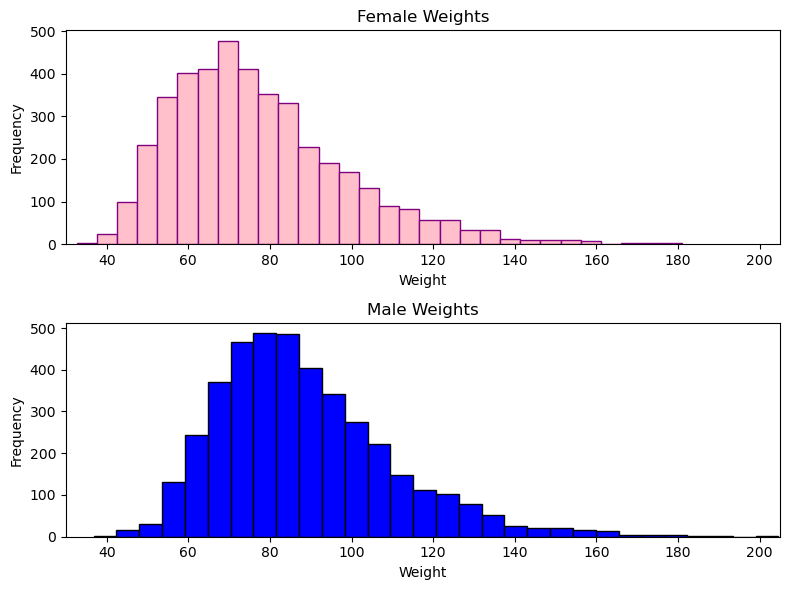

In [39]:
plt.show()

#### To draw box and whisker plot ####

In [43]:
print(f"Male weight shape:{male_weights.shape}")
print(f"Female weight shape:{female_weights.shape}")

Male weight shape:(4081,)
Female weight shape:(4221,)


In [45]:
plt.boxplot([female_weights,male_weights],tick_labels=['Female','Male'])   

{'whiskers': [<matplotlib.lines.Line2D at 0x2780a577560>,
 'caps': [<matplotlib.lines.Line2D at 0x2780a689460>,
 'boxes': [<matplotlib.lines.Line2D at 0x27809fbdac0>,
 'medians': [<matplotlib.lines.Line2D at 0x2780a689a00>,
 'fliers': [<matplotlib.lines.Line2D at 0x2780a689d00>,
 'means': []}

In [47]:
#Add titles and labels
plt.title('Comparison of Female and Male weights')
plt.ylabel('Weight(kg)')

Text(38.097222222222214, 0.5, 'Weight(kg)')

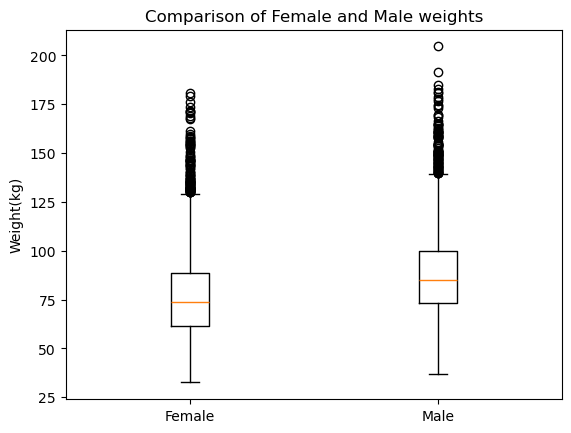

In [49]:
plt.show()

##### Interpreting the Box-and-Whisker plot #####
The line inside the box is the median. 
The box itself represents the IQR which spans from the 25th percentile (Q1) to the 75th percentile (Q3). This shows where the middle 50% of the data points lie.
If the box for males is wider than the box for females, this means that the weight variability is greater among males.

Whiskers : The whiskers extend from the edges of the box (Q1 and Q3) to the smallest and largest values within 1.5 times the IQR. The long whiskers for males would indicate that the wight range for males is wider compared to females.

Outliers : Outliers are data points that fall outside the whiskers. These are typically considered unusually high or low values compared to the rest of the data.

#### Compute the basic numerical aggreeegates of the male and female weights ####

In [53]:
import scipy.stats as stats

In [55]:
def compute_statistics(data):      #compute basic statistics
    mean=np.mean(data)
    median=np.median(data)
    minimum=np.min(data)
    maximum=np.max(data)
    range_=maximum-minimum
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    variance=np.var(data)
    std_dev=np.std(data)
    skewness=stats.skew(data)
    kurtosis=stats.kurtosis(data)
    return{
    'Mean':mean,
    'Median':median,
    'Min':minimum,
    'Max':maximum,
    'Range':range_,
    'IQR':iqr,
    'Variance':variance,
    'Standard Deviation':std_dev,
    'Skewness':skewness,
    'Kurtosis':kurtosis
}
female_stats=compute_statistics(female_weights)
male_stats=compute_statistics(male_weights)

In [57]:
female_stats,male_stats

({'Mean': 77.40379057095475,
  'Median': 73.6,
  'Min': 32.6,
  'Max': 180.9,
  'Range': 148.3,
  'IQR': 27.1,
  'Variance': 464.07966343304065,
  'Standard Deviation': 21.54250829019315,
  'Skewness': 1.03336107186799,
  'Kurtosis': 1.4009683480659731},
 {'Mean': 88.36454300416565,
  'Median': 85.0,
  'Min': 36.8,
  'Max': 204.6,
  'Range': 167.8,
  'IQR': 26.5,
  'Variance': 458.770850128082,
  'Standard Deviation': 21.418936717962495,
  'Skewness': 0.9842810741662347,
  'Kurtosis': 1.4742884754078238})

##### COMPARISON OF TWO RESULTS #####
1. Both are Right Skewness (Positively skewed) - Mean > Median > Mode
2. Both are Positive Kurtosis (Leptokurtic Distribution)
   
Both have greater spread and a more concentrate peak. There are a few very high idividuals on the upper end(outliers) pulling the average weight higher for both male and female.
   




#### Add 8th column(BMI) to the female matrix ####

In [61]:
print(female)

[[  nan   nan   nan ...   nan   nan   nan]
 [ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


In [63]:
female_heights=female[:,1]
print(female_heights)

[  nan 160.2 152.7 ... 159.6 168.5 147.8]


In [65]:
female_heights=female_heights[~np.isnan(female_heights) & ~np.isinf(female_heights)]
print(female_heights)

[160.2 152.7 161.2 ... 159.6 168.5 147.8]


In [67]:
print(female_weights)

[97.1 91.1 73.  ... 73.  78.6 82.8]


In [69]:
#Calculation of BMI
bmi=female_weights/female_heights**2

In [71]:
print(bmi)

[0.0037835  0.00390697 0.00280927 ... 0.00286587 0.00276836 0.00379037]


In [73]:
# for height in metres
changed_bmi = (bmi * 10000).astype(float)

print(changed_bmi)

[37.83504078 39.06972037 28.09265496 ... 28.65873958 27.68361084
 37.90368801]


In [75]:
# Function to reduce decimal values in the matrix
def reduce_decimal(changed_bmi, decimal_places):
    return np.round(changed_bmi, decimal_places)

# Reduce decimal values to 2 places
reduced_bmi = reduce_decimal(changed_bmi, 1)
print(reduced_bmi)


[37.8 39.1 28.1 ... 28.7 27.7 37.9]


In [77]:
#check the dim to add column
print(len(female_weights))
print(len(female_heights))
print(len(reduced_bmi))
      

4221
4221
4221


In [79]:
new_female = female[1:]

print(new_female)

[[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


In [81]:
print(len(new_female))

4221


In [83]:
#Female matrix with added BMI column
female_with_bmi=np.column_stack((new_female,reduced_bmi))
print(female_with_bmi)

[[ 97.1 160.2  34.7 ... 126.1 117.9  37.8]
 [ 91.1 152.7  33.5 ... 125.5 103.1  39.1]
 [ 73.  161.2  37.4 ... 106.2  92.   28.1]
 ...
 [ 73.  159.6  36.2 ... 104.6  99.3  28.7]
 [ 78.6 168.5  38.1 ... 102.4  98.5  27.7]
 [ 82.8 147.8  34.8 ... 121.4 110.   37.9]]


#### z scores of female ####


In [86]:
zfemale=(female_with_bmi-female_with_bmi.mean())/female_with_bmi.std()
print(zfemale)

[[ 0.53268301  1.90748607 -0.82686866 ...  1.16452594  0.9858669
  -0.75932683]
 [ 0.40195689  1.74407842 -0.85301389 ...  1.15145333  0.66340913
  -0.73100284]
 [ 0.00759975  1.92927376 -0.76804191 ...  0.73095096  0.42156581
  -0.9706674 ]
 ...
 [ 0.00759975  1.89441346 -0.79418713 ...  0.69609067  0.58061592
  -0.95759479]
 [ 0.1296108   2.08832387 -0.75279053 ...  0.64815775  0.56318577
  -0.97938247]
 [ 0.22111909  1.63731875 -0.82468989 ...  1.06212381  0.81374418
  -0.75714806]]


#### To draw scatterplot (based on zfemale) ####

In [89]:
df = pd.DataFrame(zfemale)
print(df)

             0         1         2         3         4         5         6  \
0     0.532683  1.907486 -0.826869 -0.693964 -0.802902  1.164526  0.985867   
1     0.401957  1.744078 -0.853014 -0.863908 -0.744075  1.151453  0.663409   
2     0.007600  1.929274 -0.768042 -0.754969 -0.890053  0.730951  0.421566   
3    -0.238601  1.846481 -0.754969 -0.826869 -0.951058  0.617655  0.388884   
4    -0.375864  1.785475 -0.829047 -0.842120 -0.966310  0.432460  0.011957   
...        ...       ...       ...       ...       ...       ...       ...   
4216 -0.127484  1.837765 -0.872623 -0.746254 -0.914019  0.678661  0.432460   
4217  0.964079  2.064357 -0.663461 -0.646031 -0.696143  1.214638  1.031621   
4218  0.007600  1.894413 -0.794187 -0.776757 -0.898768  0.696091  0.580616   
4219  0.129611  2.088324 -0.752791 -0.707036 -0.798545  0.648158  0.563186   
4220  0.221119  1.637319 -0.824690 -0.868265 -0.722288  1.062124  0.813744   

             7  
0    -0.759327  
1    -0.731003  
2    -0.9706

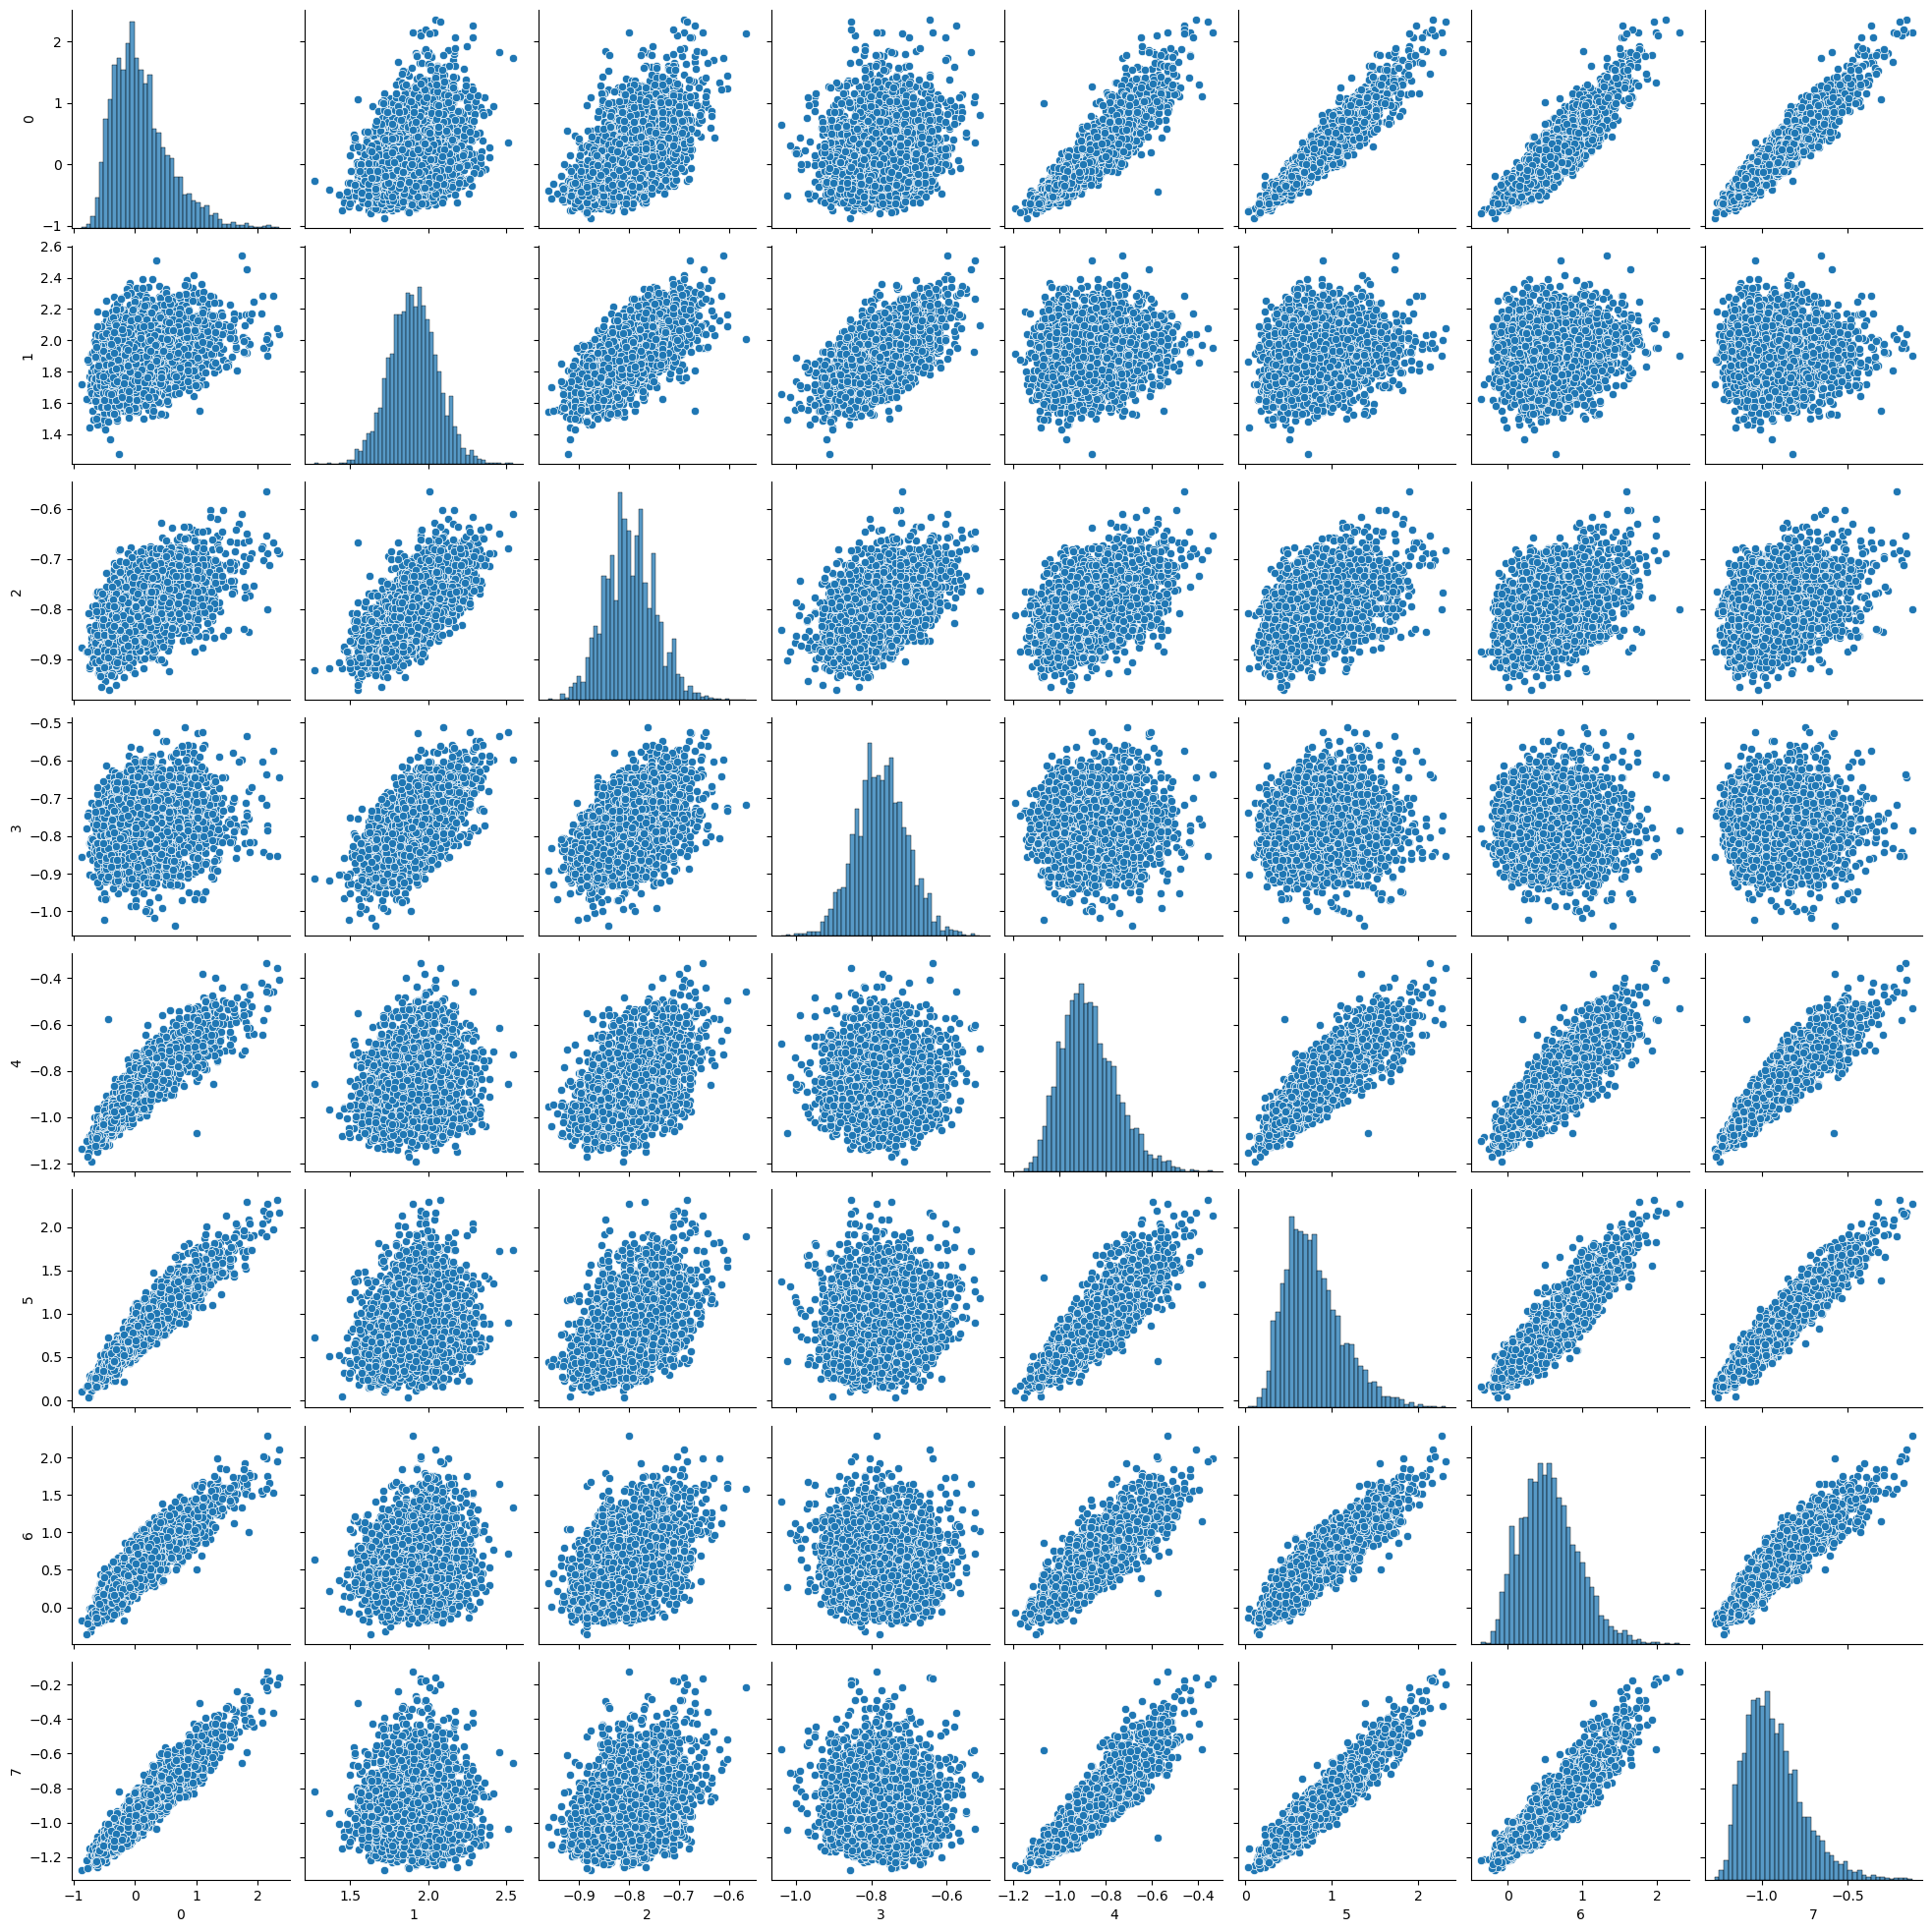

In [91]:
# Standardize the data
scaler = StandardScaler()

# Create a DataFrame for standardized data
standardized_df = pd.DataFrame(zfemale, columns=df.columns)

# Draw scatterplot matrix (pairplot)
sns.pairplot(standardized_df)
plt.show()

In [92]:
# Compute Pearson’s and Spearman’s correlation coefficients
correlation_results = {}
for col1 in standardized_df.columns:
    for col2 in standardized_df.columns:
        if col1 != col2:
            pearson_corr, _ = pearsonr(standardized_df[col1], standardized_df[col2])
            spearman_corr, _ = spearmanr(standardized_df[col1], standardized_df[col2])
            correlation_results[(col1, col2)] = {
                'Pearson': pearson_corr,
                'Spearman': spearman_corr
            }

# Display correlation results
for key, value in correlation_results.items():
    print(f"Correlation between {key[0]} and {key[1]}: Pearson = {value['Pearson']}, Spearman = {value['Spearman']}")

Correlation between 0 and 1: Pearson = 0.34549627089352664, Spearman = 0.33885953432606997
Correlation between 0 and 2: Pearson = 0.5515633829555779, Spearman = 0.5415006587543039
Correlation between 0 and 3: Pearson = 0.1931857137805234, Spearman = 0.19582140691168573
Correlation between 0 and 4: Pearson = 0.9053850873069439, Spearman = 0.9139129044284372
Correlation between 0 and 5: Pearson = 0.946553470558888, Spearman = 0.9466341287600747
Correlation between 0 and 6: Pearson = 0.9045503821880313, Spearman = 0.900169293674286
Correlation between 0 and 7: Pearson = 0.9458644523072463, Spearman = 0.9379289237923408
Correlation between 1 and 0: Pearson = 0.34549627089352664, Spearman = 0.33885953432606997
Correlation between 1 and 2: Pearson = 0.6679107474644443, Spearman = 0.6651281576336948
Correlation between 1 and 3: Pearson = 0.6572024517423714, Spearman = 0.6470103542285633
Correlation between 1 and 4: Pearson = 0.15195489563310052, Spearman = 0.1448414038314792
Correlation betwe

HIP RATIO



#### Adding two more column to males and females ####

In [95]:
# Data for males and females
males1 = male[:, [6, 1]]
print("waist circumference to height:",males1)
males2= male[:,[6,5]]
print("waist circumference to hip circumference:",males2)


waist circumference to height: [[  nan   nan]
 [120.4 182.3]
 [ 86.8 184.2]
 ...
 [114.7 168.7]
 [ 97.1 176.4]
 [ 86.9 167.5]]
waist circumference to hip circumference: [[  nan   nan]
 [120.4 108.2]
 [ 86.8  94.5]
 ...
 [114.7 118. ]
 [ 97.1  99.8]
 [ 86.9  90.5]]


In [96]:
females1=female[:,[6,1]]
print("waist circumference to height:",females1)
females2=female[:,[6,5]]
print("waist circumference to hip circumference:",females2)

waist circumference to height: [[  nan   nan]
 [117.9 160.2]
 [103.1 152.7]
 ...
 [ 99.3 159.6]
 [ 98.5 168.5]
 [110.  147.8]]
waist circumference to hip circumference: [[  nan   nan]
 [117.9 126.1]
 [103.1 125.5]
 ...
 [ 99.3 104.6]
 [ 98.5 102.4]
 [110.  121.4]]


In [97]:
# Compute waist to height ratio
males_height_ratio = males1[:, 0] / males1[:, 1]
females_height_ratio = females1[:, 0] / females1[:, 1]

In [98]:
# Compute waist to hip ratio
males_hip_ratio = males2[:, 0] / males2[:, 1]
females_hip_ratio = females2[:, 0] / females2[:, 1]

In [99]:
#Adding two more columns
males = np.column_stack((male, males_height_ratio, males_hip_ratio))
females = np.column_stack((female, females_height_ratio, females_hip_ratio))

print("Males Matrix:\n", males)
print("Females Matrix:\n", females)

Males Matrix:
 [[         nan          nan          nan ...          nan          nan
           nan]
 [ 98.8        182.3         42.         ... 120.4          0.66044981
    1.11275416]
 [ 74.3        184.2         41.1        ...  86.8          0.47122693
    0.91851852]
 ...
 [108.8        168.7         38.6        ... 114.7          0.67990516
    0.9720339 ]
 [ 79.5        176.4         39.5        ...  97.1          0.55045351
    0.97294589]
 [ 59.7        167.5         40.3        ...  86.9          0.51880597
    0.96022099]]
Females Matrix:
 [[         nan          nan          nan ...          nan          nan
           nan]
 [ 97.1        160.2         34.7        ... 117.9          0.73595506
    0.93497224]
 [ 91.1        152.7         33.5        ... 103.1          0.67518009
    0.82151394]
 ...
 [ 73.         159.6         36.2        ...  99.3          0.62218045
    0.94933078]
 [ 78.6        168.5         38.1        ...  98.5          0.58456973
    0.96191406]


#### To draw box and whisker plot ####

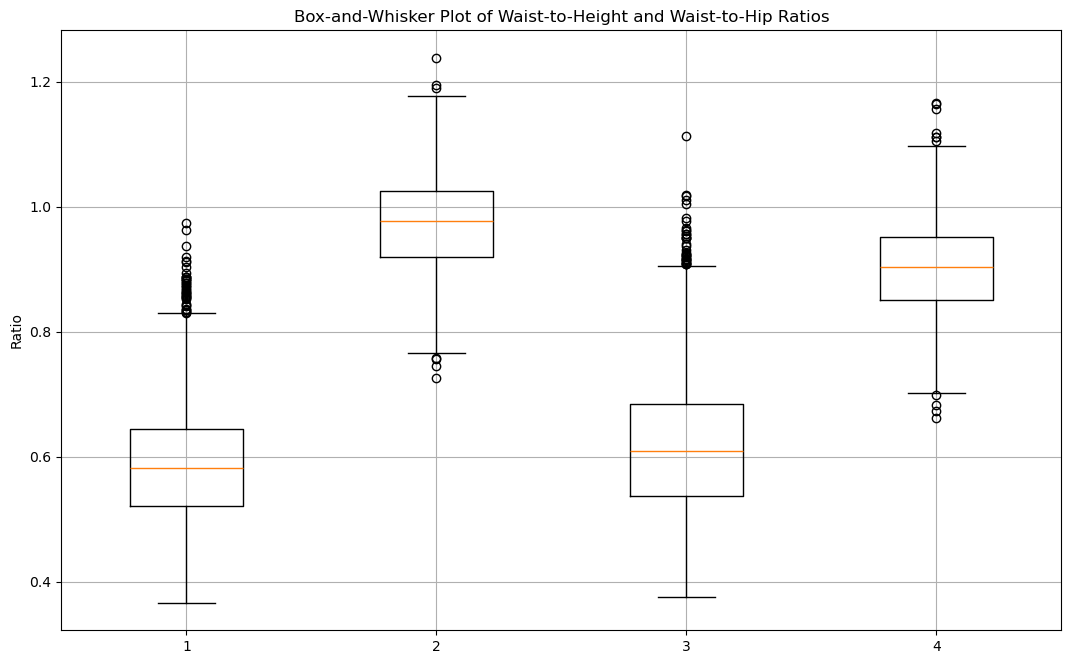

In [101]:
male_waist_to_height =males_height_ratio[1:,]
male_waist_to_hip = males_hip_ratio[1:,]
female_waist_to_height = females_height_ratio[1:,]
female_waist_to_hip = females_hip_ratio[1:,]

data =[male_waist_to_height,male_waist_to_hip ,female_waist_to_height,female_waist_to_hip]
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([1,1,1,1])
bp=ax.boxplot(data)
plt.title('Box-and-Whisker Plot of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()


#### Advantages and Disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio ####

Body mass index (BMI), waist-to-hip ratio and waist-to-height ratio are all measurements that can help assess a person's health. Each has its own advantages and disadvantages. 

##### Advantages : #####

BMI-
Easy and fast to calculate 
Can help identify overweight or obese people 
Can help maintain a healthy weight 
 
Waist to Height Ratio-
Inexpensive and easy to calculate 
Can help predict the risk of heart disease and diabetes 
 
Waist to Hip Ratio-
Can be used to screen for obesity in populations 
Doesn't need to account for age, sex, or ethnicity 

##### Disadvantages: #####

BMI is not ideal for children, pregnant women, the elderly, or athletes. BMI doesn't account for muscle mass. Both BMI and waist to height ratio can be affected by age, sex. In Waist to hip ratio, a new measure that needs more research.

#### Standarised body measurements for 5 with the lowest and highest BMI ####

In [104]:
# Extract the BMI column
bmi_column = zfemale[:, 7]

# Find indices for the 5 lowest and 5 highest BMI values
sorted_indices = np.argsort(bmi_column)
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

# Combine the indices for the subset
subset_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))

# Extract the subset of standardized measurements
subset_zfemale = zfemale[subset_indices]

# Print the standardized body measurements
print("Standardized body measurements for individuals with the 5 lowest and 5 highest BMI:")
for i, row in enumerate(subset_zfemale):
    category = "Lowest" if i < 5 else "Highest"
    print(f"{category} BMI {i % 5 + 1}: ", end="")
    print(", ".join([f"Col {j + 1} Z-score={row[j]:.2f}" for j in range(len(row))]))



Standardized body measurements for individuals with the 5 lowest and 5 highest BMI:
Lowest BMI 1: Col 1 Z-score=-0.87, Col 2 Z-score=1.72, Col 3 Z-score=-0.88, Col 4 Z-score=-0.86, Col 5 Z-score=-1.14, Col 6 Z-score=0.10, Col 7 Z-score=-0.17, Col 8 Z-score=-1.27
Lowest BMI 2: Col 1 Z-score=-0.78, Col 2 Z-score=1.88, Col 3 Z-score=-0.89, Col 4 Z-score=-0.75, Col 5 Z-score=-1.17, Col 6 Z-score=0.16, Col 7 Z-score=-0.22, Col 8 Z-score=-1.26
Lowest BMI 3: Col 1 Z-score=-0.62, Col 2 Z-score=2.18, Col 3 Z-score=-0.77, Col 4 Z-score=-0.73, Col 5 Z-score=-1.15, Col 6 Z-score=0.23, Col 7 Z-score=-0.08, Col 8 Z-score=-1.26
Lowest BMI 4: Col 1 Z-score=-0.76, Col 2 Z-score=1.87, Col 3 Z-score=-0.81, Col 4 Z-score=-0.74, Col 5 Z-score=-1.15, Col 6 Z-score=0.03, Col 7 Z-score=-0.14, Col 8 Z-score=-1.26
Lowest BMI 5: Col 1 Z-score=-0.65, Col 2 Z-score=2.04, Col 3 Z-score=-0.80, Col 4 Z-score=-0.74, Col 5 Z-score=-1.14, Col 6 Z-score=0.17, Col 7 Z-score=-0.09, Col 8 Z-score=-1.25
Highest BMI 1: Col 1 

##### Interpretation of Results #####

###### Lowest BMI Group: ######

Height Z-scores: These can vary depending on whether the individuals are tall or short relative to the population.
Weight Z-scores: These will typically be low because these individuals have lower weight relative to the average.
BMI Z-scores: These are significantly negative, indicating very low BMI relative to the population.

###### Highest BMI Group: ######

Height Z-scores: These might be average or below average, as shorter individuals with high weight often have high BMI.
Weight Z-scores: These will generally be high, reflecting the significant contribution of weight to their BMI.
BMI Z-scores: These are significantly positive, indicating very high BMI relative to the population.

Comparing the standardized height and weight measurements alongside BMI helps identify whether extreme BMI values are due to deviations in weight, height, or both.
For example, individuals with low BMI might be underweight, while those with high BMI might be overweight or obese.